# 1.数据获取

In [431]:
import pandas as pd
import numpy as np
from pandas_datareader import data
from datetime import datetime
import matplotlib.pyplot as plt
from pandas import to_datetime

In [511]:
df_tech=pd.read_excel('技术指标.xlsx')

In [512]:
df_tech

,datetime,open,close,high,low,volume,amount,AR,BR,cr,...,AMO6,AMO12,AMO24,MA10,MA120,EXPMA12,EXPMA50,BBANDS_UP,BBANDS_MID,BBANDS_LOW
0,2010-01-04,24.52,23.71,24.58,23.68,241922.76,5.802495e+05,NaN,NaN,137.360939,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-05,23.75,23.30,23.90,22.75,556499.82,1.293477e+06,NaN,NaN,118.026125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-06,23.25,22.90,23.25,22.72,412143.13,9.444537e+05,NaN,NaN,112.008161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-07,22.90,22.65,23.05,22.40,355336.85,8.041663e+05,NaN,NaN,104.222159,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-08,22.50,22.60,22.75,22.35,288543.06,6.506674e+05,NaN,NaN,104.554569,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2842,2021-12-27,17.33,17.22,17.35,17.16,731118.99,1.260455e+06,101.705757,85.490196,446.296296,...,1.419731e+06,1.748550e+06,1.766664e+06,17.477,18.890333,17.554009,18.102242,18.647257,17.7735,16.899743
2843,2021-12-28,17.22,17.17,17.33,17.09,1126638.91,1.934461e+06,99.360341,87.751004,449.484536,...,1.523969e+06,1.757749e+06,1.792401e+06,17.436,18.851667,17.494930,18.065683,18.661843,17.7600,16.858157
2844,2021-12-29,17.16,16.75,17.16,16.70,1469373.98,2.480535e+06,93.644068,82.435130,307.216495,...,1.675243e+06,1.762143e+06,1.851248e+06,17.356,18.807417,17.380326,18.014088,18.718764,17.7155,16.712236
2845,2021-12-30,16.76,16.82,16.95,16.72,796663.60,1.342374e+06,95.268817,88.381743,343.103448,...,1.615343e+06,1.587828e+06,1.856349e+06,17.266,18.757750,17.294122,17.967261,18.753032,17.6770,16.600968


In [513]:
df_tech.isna().sum().sort_values()

datetime        0
mdi             0
pdi             0
trix_9_sma      0
trix            0
             ... 
MACD_hist      33
MACD_dif       33
MACD_dea       33
EXPMA50        49
MA120         119
Length: 64, dtype: int64

In [514]:
df_tech.dropna(inplace=True)

In [515]:
time01=to_datetime(df_tech.datetime,format="%Y-%m-%d")
df_tech.datetime=time01

In [518]:
#标准化
from sklearn.preprocessing import  MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(df_tech.drop(columns=['datetime']))

In [521]:
data=pd.DataFrame(x)
data.columns=df_tech.drop(columns=['datetime']).columns

In [522]:
df_close=data['close']

In [523]:
data

,open,close,high,low,volume,amount,AR,BR,cr,cr-ma1,...,AMO6,AMO12,AMO24,MA10,MA120,EXPMA12,EXPMA50,BBANDS_UP,BBANDS_MID,BBANDS_LOW
0,0.571865,0.552311,0.557151,0.563783,0.087633,0.093950,0.259503,0.360634,0.145978,0.121227,...,0.191361,0.155998,0.126111,0.600851,0.857390,0.592143,0.672597,0.564786,0.587206,0.661053
1,0.555963,0.526156,0.541592,0.542626,0.083635,0.088240,0.223418,0.328193,0.134479,0.112652,...,0.198977,0.152033,0.129449,0.593673,0.853381,0.585037,0.668816,0.564786,0.587206,0.661053
2,0.525994,0.524939,0.527229,0.532047,0.040349,0.043188,0.236068,0.335569,0.131870,0.105178,...,0.126400,0.146595,0.128997,0.585223,0.849613,0.578826,0.665129,0.565003,0.586881,0.660335
3,0.529052,0.518248,0.526631,0.518357,0.090053,0.092907,0.228333,0.318220,0.126879,0.105104,...,0.119174,0.150770,0.133487,0.578743,0.846025,0.572479,0.661285,0.564149,0.587465,0.662051
4,0.525382,0.523723,0.524237,0.537648,0.049808,0.052995,0.241473,0.344995,0.130108,0.105720,...,0.102389,0.152110,0.134290,0.570421,0.842646,0.568001,0.657839,0.561315,0.589024,0.667134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2723,0.536391,0.526156,0.523639,0.542004,0.135491,0.140217,0.227511,0.254795,0.897146,0.538505,...,0.225211,0.315702,0.367335,0.562353,0.722050,0.567521,0.637774,0.551602,0.588602,0.675342
2724,0.529664,0.523114,0.522442,0.537648,0.214007,0.219205,0.218537,0.259880,0.903936,0.315459,...,0.242996,0.317478,0.373141,0.559748,0.719184,0.563707,0.635222,0.552430,0.587725,0.673183
2725,0.525994,0.497567,0.512268,0.513379,0.282044,0.283201,0.196666,0.247922,0.600969,0.315459,...,0.268807,0.318327,0.386414,0.554666,0.715904,0.556309,0.631620,0.555661,0.584835,0.665609
2726,0.501529,0.501825,0.499701,0.514624,0.148502,0.149817,0.202882,0.261299,0.677392,0.315459,...,0.258587,0.284672,0.387565,0.548949,0.712223,0.550743,0.628351,0.557606,0.582335,0.659833


# 2.特征筛选

## 2.1 PCA

In [524]:
from sklearn.decomposition import PCA

In [525]:
pca=PCA(n_components='mle')

In [526]:
np_pca=pca.fit_transform(data.drop(columns=['close']))

In [527]:
np_pca

array([[ 7.93527331e-01, -7.11549054e-01, -6.18903707e-01, ...,
         2.48109839e-04,  8.50829590e-04, -6.61752099e-04],
       [ 7.72686959e-01, -9.57829639e-01, -5.67568441e-01, ...,
        -5.26089147e-04,  1.55974953e-03, -1.08803635e-03],
       [ 7.33515844e-01, -9.79456057e-01, -5.94533522e-01, ...,
         4.40654206e-04,  1.36287991e-03, -8.44494298e-04],
       ...,
       [ 8.58085532e-01, -1.06648037e+00,  7.09088846e-01, ...,
        -1.78802771e-04,  1.03764306e-03,  7.56557670e-04],
       [ 8.21770962e-01, -9.93715277e-01,  6.46935397e-01, ...,
        -3.43862492e-04, -1.00882386e-04,  6.13926659e-04],
       [ 8.15742596e-01, -1.06360858e+00,  7.59249686e-01, ...,
         1.02755022e-03, -2.15273736e-04,  2.33741090e-04]])

In [528]:
df_pca=pd.DataFrame(np_pca)

In [529]:
df_pca

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.793527,-0.711549,-0.618904,0.123916,-0.420404,0.023013,0.099938,-0.205904,-0.076884,0.255109,...,0.004384,0.012045,-0.001145,0.004516,-0.000410,-0.000552,-0.000174,0.000248,0.000851,-0.000662
1,0.772687,-0.957830,-0.567568,0.206461,-0.319518,-0.004194,0.052660,-0.149319,-0.162840,0.276972,...,0.011844,0.003339,-0.001971,0.005410,0.006948,-0.000424,-0.001394,-0.000526,0.001560,-0.001088
2,0.733516,-0.979456,-0.594534,0.152055,-0.187235,0.021498,-0.069269,-0.076696,-0.143756,0.271596,...,-0.003610,0.005696,-0.000086,0.005964,0.005238,-0.001077,-0.003186,0.000441,0.001363,-0.000844
3,0.729362,-0.977696,-0.579182,0.155495,-0.058031,0.082558,-0.117039,-0.015319,-0.183799,0.226687,...,0.003782,-0.001082,-0.000068,0.010204,0.004425,0.000626,-0.001665,0.002409,0.000762,-0.001989
4,0.715479,-0.916938,-0.610561,0.113012,0.000052,0.091745,-0.163836,0.033309,-0.146229,0.215846,...,-0.008612,0.005100,0.002515,0.002437,0.005070,0.001417,-0.001969,0.002129,0.000584,-0.001711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2723,0.897068,-0.991847,0.614364,-0.370160,-0.059120,-0.101469,0.107956,0.555111,0.006895,0.082985,...,-0.001195,-0.002957,0.001175,0.001372,-0.002741,0.003091,-0.001841,0.002535,0.001445,0.000698
2724,0.881388,-0.936521,0.630366,-0.322301,0.036376,-0.068784,0.065660,0.464509,-0.031151,0.086015,...,0.003604,-0.001505,0.001552,-0.000615,-0.001332,0.002470,-0.001275,0.001795,0.001366,0.000690
2725,0.858086,-1.066480,0.709089,-0.109182,0.285179,-0.090538,0.081581,0.381331,-0.100225,0.056332,...,0.004861,-0.001949,-0.003699,-0.000622,-0.000444,0.002295,-0.002323,-0.000179,0.001038,0.000757
2726,0.821771,-0.993715,0.646935,-0.169098,0.378312,-0.123542,0.001666,0.445825,-0.032223,0.019750,...,0.001551,0.000145,-0.004742,-0.005209,0.002832,0.003056,-0.001189,-0.000344,-0.000101,0.000614


In [530]:
#计算出贡献度达到85%的六个成分
sum(pca.explained_variance_ratio_[:6])

0.8593115987469748

In [531]:
#筛选出前六个主要成分
df_pca=df_pca.iloc[:,:6]

In [532]:
df_pca

,0,1,2,3,4,5
0,0.793527,-0.711549,-0.618904,0.123916,-0.420404,0.023013
1,0.772687,-0.957830,-0.567568,0.206461,-0.319518,-0.004194
2,0.733516,-0.979456,-0.594534,0.152055,-0.187235,0.021498
3,0.729362,-0.977696,-0.579182,0.155495,-0.058031,0.082558
4,0.715479,-0.916938,-0.610561,0.113012,0.000052,0.091745
...,...,...,...,...,...,...
2723,0.897068,-0.991847,0.614364,-0.370160,-0.059120,-0.101469
2724,0.881388,-0.936521,0.630366,-0.322301,0.036376,-0.068784
2725,0.858086,-1.066480,0.709089,-0.109182,0.285179,-0.090538
2726,0.821771,-0.993715,0.646935,-0.169098,0.378312,-0.123542


## 2.2 Lasso回归

In [533]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split 

In [534]:
X

,open,high,low,volume,amount,AR,BR,cr,cr-ma1,cr-ma2,...,AMO6,AMO12,AMO24,MA10,MA120,EXPMA12,EXPMA50,BBANDS_UP,BBANDS_MID,BBANDS_LOW
0,0.571865,0.557151,0.563783,0.087633,0.093950,0.259503,0.360634,0.145978,0.121227,0.131312,...,0.191361,0.155998,0.126111,0.600851,0.857390,0.592143,0.672597,0.564786,0.587206,0.661053
1,0.555963,0.541592,0.542626,0.083635,0.088240,0.223418,0.328193,0.134479,0.112652,0.144300,...,0.198977,0.152033,0.129449,0.593673,0.853381,0.585037,0.668816,0.564786,0.587206,0.661053
2,0.525994,0.527229,0.532047,0.040349,0.043188,0.236068,0.335569,0.131870,0.105178,0.158528,...,0.126400,0.146595,0.128997,0.585223,0.849613,0.578826,0.665129,0.565003,0.586881,0.660335
3,0.529052,0.526631,0.518357,0.090053,0.092907,0.228333,0.318220,0.126879,0.105104,0.177134,...,0.119174,0.150770,0.133487,0.578743,0.846025,0.572479,0.661285,0.564149,0.587465,0.662051
4,0.525382,0.524237,0.537648,0.049808,0.052995,0.241473,0.344995,0.130108,0.105720,0.199481,...,0.102389,0.152110,0.134290,0.570421,0.842646,0.568001,0.657839,0.561315,0.589024,0.667134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2723,0.536391,0.523639,0.542004,0.135491,0.140217,0.227511,0.254795,0.897146,0.538505,0.334975,...,0.225211,0.315702,0.367335,0.562353,0.722050,0.567521,0.637774,0.551602,0.588602,0.675342
2724,0.529664,0.522442,0.537648,0.214007,0.219205,0.218537,0.259880,0.903936,0.315459,0.334975,...,0.242996,0.317478,0.373141,0.559748,0.719184,0.563707,0.635222,0.552430,0.587725,0.673183
2725,0.525994,0.512268,0.513379,0.282044,0.283201,0.196666,0.247922,0.600969,0.315459,0.334975,...,0.268807,0.318327,0.386414,0.554666,0.715904,0.556309,0.631620,0.555661,0.584835,0.665609
2726,0.501529,0.499701,0.514624,0.148502,0.149817,0.202882,0.261299,0.677392,0.315459,0.334975,...,0.258587,0.284672,0.387565,0.548949,0.712223,0.550743,0.628351,0.557606,0.582335,0.659833


In [535]:
X=data.drop(columns=['close'])
y=df_close.shift()
y[0]=y[2]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
# 通过设置不同的alpha值建立三个lasso实例
lasso = Lasso(alpha=1).fit(X_train,y_train)
lasso001 =Lasso(alpha=0.01).fit(X_train,y_train)
lasso00001 = Lasso(alpha=0.0001).fit(X_train,y_train)

# 输出三个lasso实例的信息
print('**********************************')
print("Lasso alpha=0.1")
print ("training set score:",lasso.score(X_train,y_train))
print ("test set score:",lasso.score(X_test,y_test))
print ("Number of features used:{}".format(np.sum(lasso.coef_!=0)))

print('**********************************')
print("Lasso alpha=0.01")
print ("training set score:",lasso001.score(X_train,y_train))
print ("test set score:",lasso001.score(X_test,y_test))
print ("Number of features used:{}".format(np.sum(lasso001.coef_!=0)))

print('**********************************')
print("Lasso alpha=0.0001")
print ("training set score:",lasso00001.score(X_train,y_train))
print ("test set score:",lasso00001.score(X_test,y_test))
print ("Number of features used:{}".format(np.sum(lasso00001.coef_!=0)))

**********************************
Lasso alpha=0.1
training set score: 0.0
test set score: -0.0051855625003396355
Number of features used:0
**********************************
Lasso alpha=0.01
training set score: 0.958036368457022
test set score: 0.9560445582844901
Number of features used:3
**********************************
Lasso alpha=0.0001
training set score: 0.9978655117420304
test set score: 0.9984503696555478
Number of features used:13


In [536]:
lasso00001.coef_!=0

array([ True, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True,  True,  True, False, False,  True,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False])

In [537]:
X.columns

Index(['open', 'high', 'low', 'volume', 'amount', 'AR', 'BR', 'cr', 'cr-ma1',
       'cr-ma2', 'cr-ma3', 'vr', 'vr_6_sma', 'PSY', 'PSYMA', 'CCI', 'MFI',
       'ROC', 'kdjk', 'kdjd', 'kdjj', 'wr_10', 'wr_6', 'rsi_6', 'rsi_12',
       'RVI', 'tr', 'atr', 'BIAS6', 'BIAS12', 'BIAS24', 'MACD_dif', 'MACD_dea',
       'MACD_hist', 'trix', 'trix_9_sma', 'pdi', 'mdi', 'dx', 'adx', 'adxr',
       'dma', 'AMA', 'DPO', 'MADPO', 'VHF', 'MTM', 'MTMMA', 'OBV', 'AD',
       'MAVOL5', 'MAVOL10', 'AMO6', 'AMO12', 'AMO24', 'MA10', 'MA120',
       'EXPMA12', 'EXPMA50', 'BBANDS_UP', 'BBANDS_MID', 'BBANDS_LOW'],
      dtype='object')

In [538]:
df_lasso=X.iloc[:,[0,2,3,18,20,21,22,25,26,31,44,55,57]]

In [539]:
df_lasso

,open,low,volume,kdjk,kdjj,wr_10,wr_6,RVI,tr,MACD_dif,MADPO,MA10,EXPMA12
0,0.571865,0.563783,0.087633,0.305029,0.175646,0.100000,0.100000,0.224940,0.062577,0.617452,0.733721,0.600851,0.592143
1,0.555963,0.542626,0.083635,0.188659,0.068943,0.027322,0.027322,0.136636,0.056442,0.606365,0.728358,0.593673,0.585037
2,0.525994,0.532047,0.040349,0.139415,0.070855,0.100000,0.143885,0.069535,0.047853,0.597655,0.713074,0.585223,0.578826
3,0.529052,0.518357,0.090053,0.122042,0.108051,0.139640,0.192547,0.055417,0.073620,0.589352,0.702038,0.578743,0.572479
4,0.525382,0.537648,0.049808,0.126266,0.160497,0.180180,0.256410,0.050221,0.030675,0.584916,0.686114,0.570421,0.568001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2723,0.536391,0.542004,0.135491,0.044247,0.155314,0.059406,0.109091,0.160769,0.020859,0.585260,0.680412,0.562353,0.567521
2724,0.529664,0.537648,0.214007,0.051411,0.180184,0.121212,0.129032,0.194233,0.026994,0.582280,0.676784,0.559748,0.563707
2725,0.525994,0.513379,0.282044,0.027494,0.153288,0.047619,0.053191,0.249805,0.055215,0.573289,0.666532,0.554666,0.556309
2726,0.501529,0.514624,0.148502,0.039307,0.182095,0.114286,0.164384,0.120811,0.025767,0.568152,0.660377,0.548949,0.550743


# 3.建模前数据处理

In [540]:
def series_to_supervised(data, n_in=1):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    return agg
#定义数据转换化函数，可以自定义用不同长度的历史期间数据预测

In [541]:
df_close

0       0.552311
1       0.526156
2       0.524939
3       0.518248
4       0.523723
          ...   
2723    0.526156
2724    0.523114
2725    0.497567
2726    0.501825
2727    0.481144
Name: close, Length: 2728, dtype: float64

In [663]:
reframed_data=series_to_supervised(data,30)
reframed_df_pca=series_to_supervised(df_pca,30)
reframed_df_lasso=series_to_supervised(df_lasso,30)
reframed_df_close=df_close.shift(30)
reframed_df_close2=reframed_df_lasso=series_to_supervised(pd.DataFrame(df_close),30)

In [664]:
reframed_data=reframed_data.dropna()
reframed_df_close=reframed_df_close.dropna()
reframed_df_close2=reframed_df_close2.dropna()
reframed_df_pca=reframed_df_pca.dropna()
reframed_df_lasso=reframed_df_lasso.dropna()

In [665]:
reframed_df_pca=reframed_df_pca.join(reframed_df_close2, lsuffix='_l', rsuffix='_r')
reframed_df_lasso=reframed_df_lasso.join(reframed_df_close2, lsuffix='_l', rsuffix='_r')

In [666]:
reframed_df_close=np.array(reframed_df_close)
reframed_df_close2=np.array(reframed_df_close2)
reframed_data=np.array(reframed_data)
reframed_df_pca=np.array(reframed_df_pca)
reframed_df_lasso=np.array(reframed_df_lasso)

In [667]:
#划分训练集
training_size=int(len(reframed_df_close)*0.6)
validation_size=int(len(reframed_df_close)*0.3)
test_size=len(reframed_df_close)-training_size-validation_size
train_y,validation_y,test_y=reframed_df_close[0:training_size],reframed_df_close[training_size:(training_size+validation_size)],reframed_df_close[(training_size+validation_size):len(reframed_df_close)]
train_X1,validation_X1,test_X1=reframed_df_close2[0:training_size],reframed_df_close2[training_size:(training_size+validation_size)],reframed_df_close2[(training_size+validation_size):]
train_X2,validation_X2,test_X2=reframed_data[0:training_size],reframed_data[training_size:(training_size+validation_size)],reframed_data[(training_size+validation_size):]
train_X3,validation_X3,test_X3=reframed_df_pca[0:training_size],reframed_df_pca[training_size:(training_size+validation_size)],reframed_df_pca[(training_size+validation_size):]
train_X4,validation_X4,test_X4=reframed_df_lasso[0:training_size],reframed_df_lasso[training_size:(training_size+validation_size)],reframed_df_lasso[(training_size+validation_size):]

In [668]:
train_X1 = train_X1.reshape((train_X1.shape[0], 1, train_X1.shape[1]))
validation_X1= validation_X1.reshape((validation_X1.shape[0], 1, validation_X1.shape[1]))
test_X1 = test_X1.reshape((test_X1.shape[0], 1, test_X1.shape[1]))
train_X2 = train_X2.reshape((train_X2.shape[0], 1, train_X2.shape[1]))
validation_X2= validation_X2.reshape((validation_X2.shape[0], 1, validation_X2.shape[1]))
test_X2 = test_X2.reshape((test_X2.shape[0], 1, test_X2.shape[1]))
train_X3 = train_X3.reshape((train_X3.shape[0], 1, train_X3.shape[1]))
validation_X3= validation_X3.reshape((validation_X3.shape[0], 1, validation_X3.shape[1]))
test_X3 = test_X3.reshape((test_X3.shape[0], 1, test_X3.shape[1]))
train_X4 = train_X4.reshape((train_X4.shape[0], 1, train_X4.shape[1]))
validation_X4= validation_X4.reshape((validation_X4.shape[0], 1, validation_X4.shape[1]))
test_X4 = test_X4.reshape((test_X4.shape[0], 1, test_X4.shape[1]))

# 4.模型建立

## 4.1 单独以收盘价建立模型

In [669]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import GRU

In [670]:
model1=Sequential() 
model1.add(LSTM(50,return_sequences=True,input_shape=(train_X1.shape[1], train_X1.shape[2]))) 
model1.add(LSTM(50,return_sequences=True)) 
model1.add(LSTM(50)) 
model1.add(Dense(1)) 
model1.compile(loss='mean_squared_error',optimizer='adam')

In [671]:
result1 = model1.fit(train_X1,train_y,validation_data=(validation_X1,validation_y),epochs=60,batch_size=64,verbose=1)

Train on 1618 samples, validate on 809 samples
Epoch 1/60
1618/1618 [==============================] - 1s 598us/step - loss: 0.0818 - val_loss: 0.0044
Epoch 2/60
1618/1618 [==============================] - 0s 63us/step - loss: 0.0111 - val_loss: 0.0039
Epoch 3/60
1618/1618 [==============================] - 0s 59us/step - loss: 0.0066 - val_loss: 0.0029
Epoch 4/60
1618/1618 [==============================] - 0s 67us/step - loss: 0.0050 - val_loss: 0.0022
Epoch 5/60
1618/1618 [==============================] - 0s 61us/step - loss: 0.0040 - val_loss: 0.0017
Epoch 6/60
1618/1618 [==============================] - 0s 64us/step - loss: 0.0029 - val_loss: 0.0012
Epoch 7/60
1618/1618 [==============================] - 0s 63us/step - loss: 0.0019 - val_loss: 8.7465e-04
Epoch 8/60
1618/1618 [==============================] - 0s 61us/step - loss: 0.0014 - val_loss: 7.0337e-04
Epoch 9/60
1618/1618 [==============================] - 0s 57us/step - loss: 0.0012 - val_loss: 6.1155e-04
Epoch 10/60
1

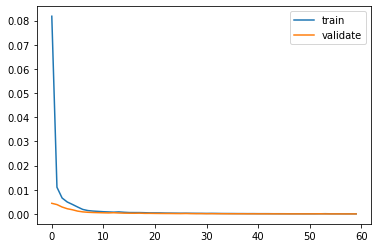

In [672]:
plt.plot(result1.history['loss'], label='train')
plt.plot(result1.history['val_loss'], label='validate')
plt.legend()
plt.show()

In [674]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

predict_train_y1=model1.predict(train_X1)
predict_test_y1=model1.predict(test_X1)
mae= mean_absolute_error(test_y, predict_test_y1)
mse = mean_squared_error(test_y, predict_test_y1)
R2 = r2_score(test_y,predict_test_y1)
rmse = sqrt(mse)
print('mae:',mae,'R2:',R2,'rmse:',rmse)
#打印出预测效果的评估指标

mae: 0.00891116088818691 R2: 0.9928103524733742 rmse: 0.0115751401019232


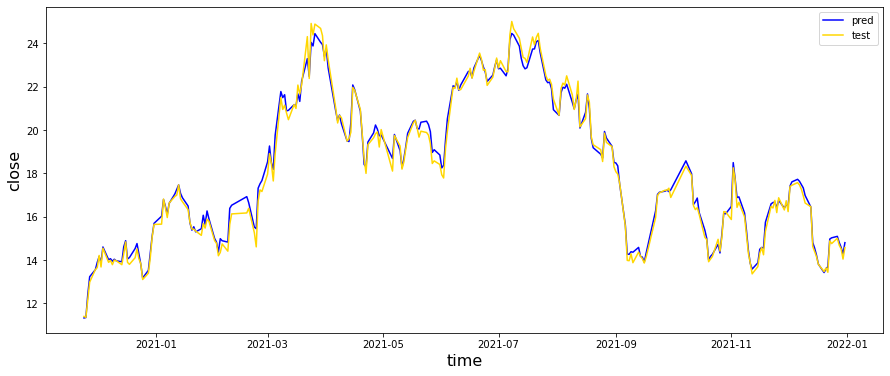

In [676]:
plt.figure(figsize=(15, 6))
plt.plot(df_tech.drop([i for i in range(119,149)]).datetime[(training_size+validation_size):], predict_test_y1*df_tech.close.max(), color='blue', label='pred')
plt.plot(df_tech.drop([i for i in range(119,149)]).datetime[(training_size+validation_size):], test_y*df_tech.close.max(), color='gold', label='test')#通过乘以AQI最大值反归一化
plt.legend() # 显示图例
plt.ylabel('close',fontsize=16)  
plt.xlabel('time',fontsize=16)
plt.show()
#预测结果可视化

## 4.2 以全部指标建立模型

In [677]:
model2=Sequential() 
model2.add(LSTM(100,return_sequences=True,input_shape=(train_X2.shape[1], train_X2.shape[2]))) 
model2.add(LSTM(100,return_sequences=True)) 
model2.add(LSTM(100)) 
model2.add(Dense(1)) 
model2.compile(loss='mean_squared_error',optimizer='adam')

In [678]:
result2 = model2.fit(train_X2,train_y,validation_data=(validation_X2,validation_y),epochs=60,batch_size=64,verbose=1)

Train on 1618 samples, validate on 809 samples
Epoch 1/60
1618/1618 [==============================] - 1s 755us/step - loss: 0.0431 - val_loss: 0.0071
Epoch 2/60
1618/1618 [==============================] - 0s 226us/step - loss: 0.0038 - val_loss: 0.0082
Epoch 3/60
1618/1618 [==============================] - 0s 229us/step - loss: 0.0011 - val_loss: 0.0050
Epoch 4/60
1618/1618 [==============================] - 0s 209us/step - loss: 7.7445e-04 - val_loss: 0.0036
Epoch 5/60
1618/1618 [==============================] - 0s 234us/step - loss: 5.0248e-04 - val_loss: 0.0038
Epoch 6/60
1618/1618 [==============================] - 0s 218us/step - loss: 5.4851e-04 - val_loss: 8.2805e-04
Epoch 7/60
1618/1618 [==============================] - 0s 248us/step - loss: 4.1290e-04 - val_loss: 0.0019
Epoch 8/60
1618/1618 [==============================] - 0s 222us/step - loss: 3.3516e-04 - val_loss: 4.8222e-04
Epoch 9/60
1618/1618 [==============================] - 0s 237us/step - loss: 3.0164e-04 - va

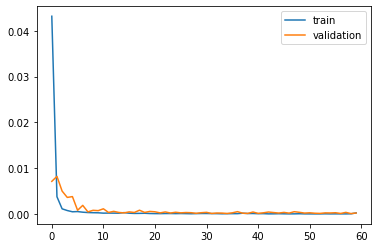

In [679]:
plt.plot(result2.history['loss'], label='train')
plt.plot(result2.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [680]:
predict_train_y2=model2.predict(train_X2)
predict_test_y2=model2.predict(test_X2)
mae= mean_absolute_error(test_y, predict_test_y2)
mse = mean_squared_error(test_y, predict_test_y2)
R2 = r2_score(test_y,predict_test_y2)
rmse = sqrt(mse)
print('mae:',mae,'R2:',R2,'rmse:',rmse)
#打印出预测效果的评估指标

mae: 0.10424141679971716 R2: 0.28816057549623497 rmse: 0.11517639343102233


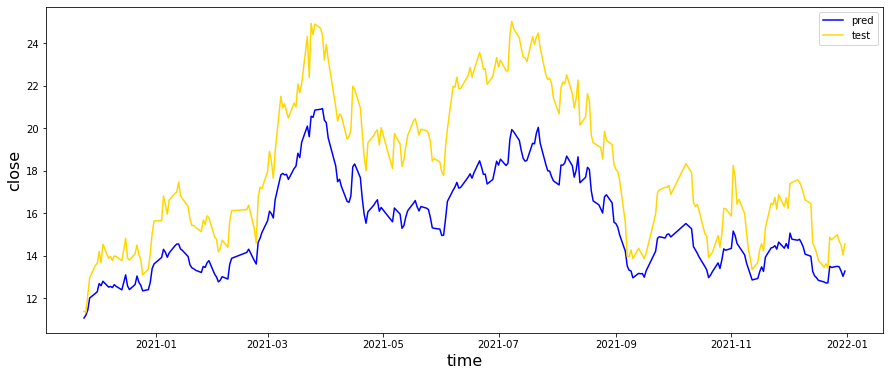

In [681]:
plt.figure(figsize=(15, 6))
plt.plot(df_tech.drop([i for i in range(119,149)]).datetime[(training_size+validation_size):], predict_test_y2*df_tech.close.max(), color='blue', label='pred')
plt.plot(df_tech.drop([i for i in range(119,149)]).datetime[(training_size+validation_size):], test_y*df_tech.close.max(), color='gold', label='test')#通过乘以AQI最大值反归一化
plt.legend() # 显示图例
plt.ylabel('close',fontsize=16)  
plt.xlabel('time',fontsize=16)
plt.show()
#预测结果可视化

## 4.3 PCA+LSTM模型

In [687]:
model3=Sequential() 
model3.add(LSTM(100,return_sequences=True,input_shape=(train_X3.shape[1], train_X3.shape[2]))) 
#model3.add(Dropout(0.2))
model3.add(LSTM(100,return_sequences=True))
#model3.add(Dropout(0.1))
model3.add(LSTM(100)) 
model3.add(Dense(1)) 
model3.compile(loss='mean_squared_error',optimizer='adam')

In [688]:
result3 = model3.fit(train_X3,train_y,validation_data=(validation_X3,validation_y),epochs=60,batch_size=64,verbose=1)

Train on 1618 samples, validate on 809 samples
Epoch 1/60
1618/1618 [==============================] - 1s 643us/step - loss: 0.0429 - val_loss: 0.0436
Epoch 2/60
1618/1618 [==============================] - 0s 122us/step - loss: 0.0034 - val_loss: 0.0310
Epoch 3/60
1618/1618 [==============================] - 0s 122us/step - loss: 0.0014 - val_loss: 0.0256
Epoch 4/60
1618/1618 [==============================] - 0s 119us/step - loss: 0.0010 - val_loss: 0.0221
Epoch 5/60
1618/1618 [==============================] - 0s 130us/step - loss: 7.7201e-04 - val_loss: 0.0171
Epoch 6/60
1618/1618 [==============================] - 0s 129us/step - loss: 6.1910e-04 - val_loss: 0.0133
Epoch 7/60
1618/1618 [==============================] - 0s 119us/step - loss: 4.1288e-04 - val_loss: 0.0101
Epoch 8/60
1618/1618 [==============================] - 0s 126us/step - loss: 3.2101e-04 - val_loss: 0.0080
Epoch 9/60
1618/1618 [==============================] - 0s 121us/step - loss: 2.7122e-04 - val_loss: 0.00

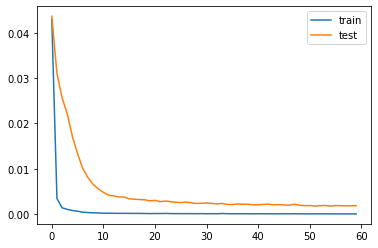

In [689]:
plt.plot(result3.history['loss'], label='train')
plt.plot(result3.history['val_loss'], label='test')
plt.legend()
plt.show()

In [690]:
predict_train_y3=model3.predict(train_X3)
predict_test_y3=model3.predict(test_X3)
mae= mean_absolute_error(test_y, predict_test_y3)
mse = mean_squared_error(test_y, predict_test_y3)
R2 = r2_score(test_y,predict_test_y3)
rmse = sqrt(mse)
print('mae:',mae,'R2:',R2,'rmse:',rmse)
#打印出预测效果的评估指标

mae: 0.07753586432071605 R2: 0.5717463983190869 rmse: 0.0893352729319445


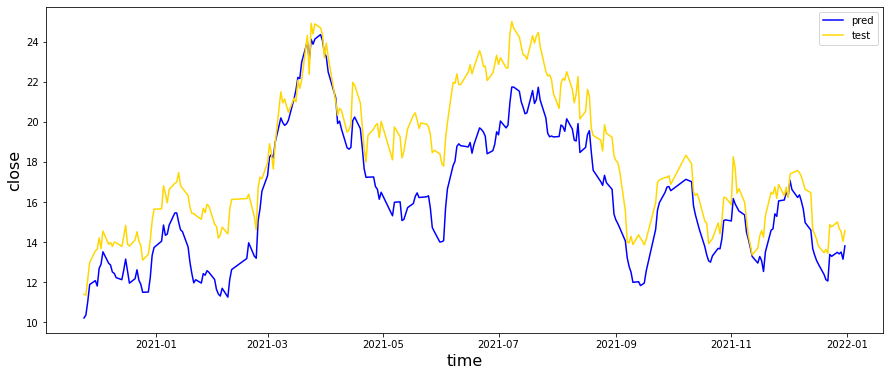

In [691]:
plt.figure(figsize=(15, 6))
plt.plot(df_tech.drop([i for i in range(119,149)]).datetime[(training_size+validation_size):], predict_test_y3*df_tech.close.max(), color='blue', label='pred')
plt.plot(df_tech.drop([i for i in range(119,149)]).datetime[(training_size+validation_size):], test_y*df_tech.close.max(), color='gold', label='test')#通过乘以AQI最大值反归一化
plt.legend() # 显示图例
plt.ylabel('close',fontsize=16)  
plt.xlabel('time',fontsize=16)
plt.show()
#预测结果可视化

## 4.4 Lasso+LSTM模型

In [694]:
model4=Sequential() 
model4.add(LSTM(100,return_sequences=True,input_shape=(train_X4.shape[1], train_X4.shape[2]))) 
model4.add(LSTM(100,return_sequences=True)) 
model4.add(LSTM(100)) 
model4.add(Dense(1)) 
model4.compile(loss='mean_squared_error',optimizer='adam')

In [695]:
result4 = model4.fit(train_X4,train_y,validation_data=(validation_X4,validation_y),epochs=60,batch_size=64,verbose=1)

Train on 1618 samples, validate on 809 samples
Epoch 1/60
1618/1618 [==============================] - 1s 632us/step - loss: 0.0502 - val_loss: 0.0035
Epoch 2/60
1618/1618 [==============================] - 0s 104us/step - loss: 0.0078 - val_loss: 0.0027
Epoch 3/60
1618/1618 [==============================] - 0s 106us/step - loss: 0.0044 - val_loss: 0.0017
Epoch 4/60
1618/1618 [==============================] - 0s 110us/step - loss: 0.0029 - val_loss: 0.0011
Epoch 5/60
1618/1618 [==============================] - 0s 104us/step - loss: 0.0018 - val_loss: 9.3769e-04
Epoch 6/60
1618/1618 [==============================] - 0s 104us/step - loss: 0.0014 - val_loss: 8.1566e-04
Epoch 7/60
1618/1618 [==============================] - 0s 110us/step - loss: 0.0012 - val_loss: 6.0312e-04
Epoch 8/60
1618/1618 [==============================] - 0s 117us/step - loss: 9.9824e-04 - val_loss: 6.2034e-04
Epoch 9/60
1618/1618 [==============================] - 0s 114us/step - loss: 8.8180e-04 - val_loss: 

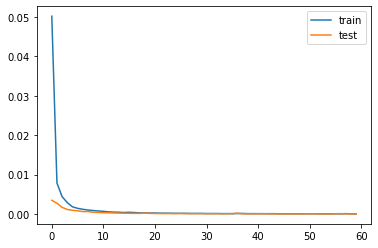

In [696]:
plt.plot(result4.history['loss'], label='train')
plt.plot(result4.history['val_loss'], label='test')
plt.legend()
plt.show()

In [697]:
predict_train_y4=model4.predict(train_X4)
predict_test_y4=model4.predict(test_X4)
mae= mean_absolute_error(test_y, predict_test_y4)
mse = mean_squared_error(test_y, predict_test_y4)
R2 = r2_score(test_y,predict_test_y4)
rmse = sqrt(mse)
print('mae:',mae,'R2:',R2,'rmse:',rmse)
#打印出预测效果的评估指标

mae: 0.005408221827915503 R2: 0.9971613404167989 rmse: 0.007273260015599906


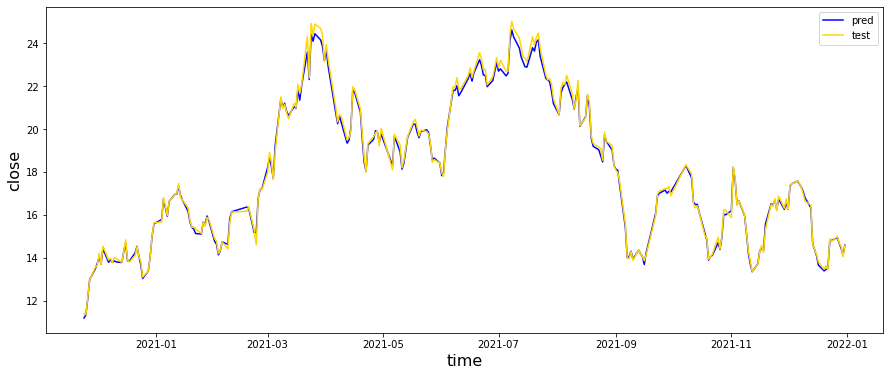

In [698]:
plt.figure(figsize=(15, 6))
plt.plot(df_tech.drop([i for i in range(119,149)]).datetime[(training_size+validation_size):], predict_test_y4*df_tech.close.max(), color='blue', label='pred')
plt.plot(df_tech.drop([i for i in range(119,149)]).datetime[(training_size+validation_size):], test_y*df_tech.close.max(), color='gold', label='test')#通过乘以AQI最大值反归一化
plt.legend() # 显示图例
plt.ylabel('close',fontsize=16)  
plt.xlabel('time',fontsize=16)
plt.show()
#预测结果可视化